# Assignment 1.LDA and Logistic Regression

In [2]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

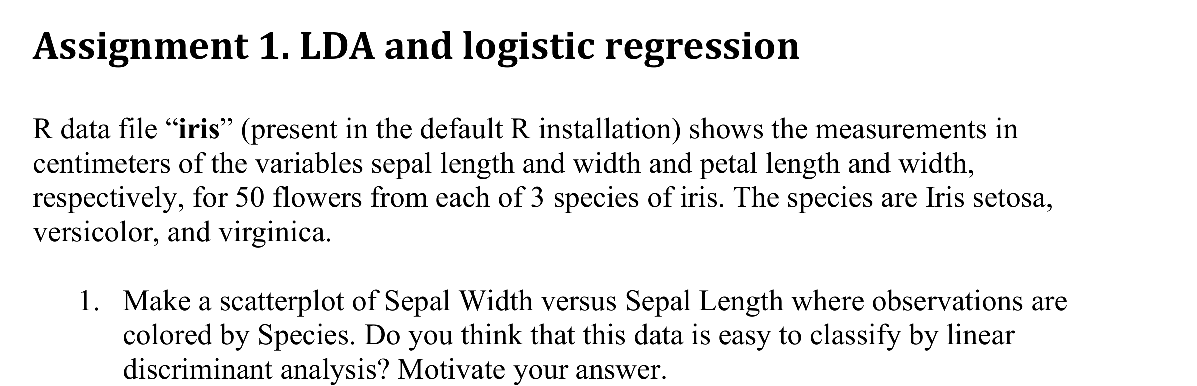

In [3]:
attach(iris)

In [4]:
Width = iris$Sepal.Width
Lenght = iris$Petal.Length


In [5]:
unique(as.factor(iris$Species))

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

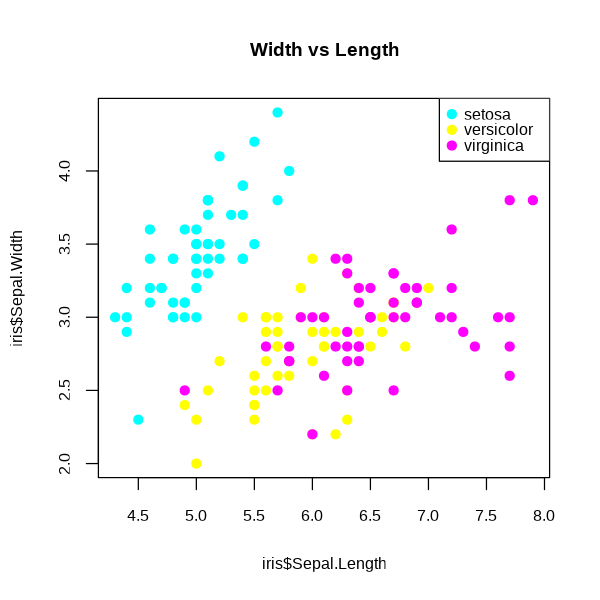

In [269]:
plot(iris$Sepal.Length,iris$Sepal.Width,
col=c(5,7,6)[iris$Species], pch=21,
bg=c(5,7,6)[iris$Species],
main="Width vs Length")
legend('topright',col = c(5,7,6),legend =unique(as.factor(iris$Species)),
      pch=c(19,19,19))


There are three different classes observed in the scatterplot. Setosa can be perfectly classified linearly.
Whereas, some of the data points of the species versicolor and virginica are mixed non linearly. So, there
could be some errors concerning the classification of the species using LDA.


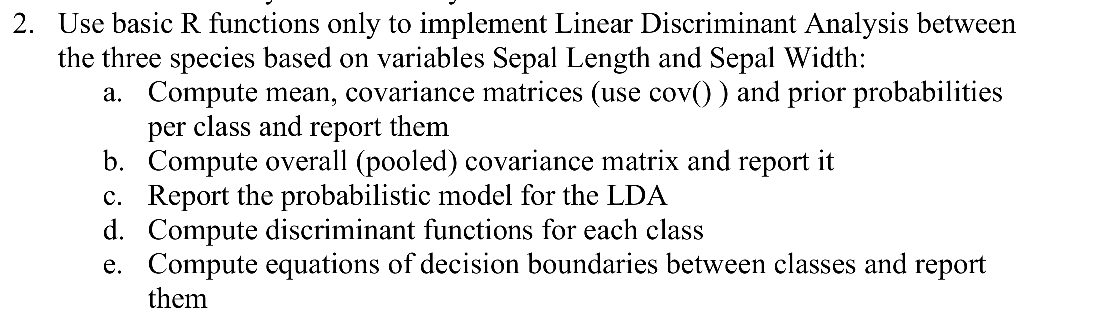

In [7]:
library(MASS)

In [8]:
resLDA = lda(Species~ Sepal.Length + Sepal.Width,data = iris)
resLDA

Call:
lda(Species ~ Sepal.Length + Sepal.Width, data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width
setosa            5.006       3.428
versicolor        5.936       2.770
virginica         6.588       2.974

Coefficients of linear discriminants:
                   LD1        LD2
Sepal.Length -2.141178 -0.8152721
Sepal.Width   2.768109 -2.0960764

Proportion of trace:
   LD1    LD2 
0.9628 0.0372 

In [9]:
(resLDA$means)

,Sepal.Length,Sepal.Width
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [10]:
resLDA$prior

setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333

In [11]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [33]:
#setosas = filter(iris, Species == "setosa") #Filter iris data from setosas
setosas = subset(iris , iris$Species == 'setosa',select=c(1:2))
versicolors = subset(iris, Species == 'versicolor',select=c(1:2))
virginicas = subset(iris, Species == 'virginica',,select=c(1:2))

In [62]:
s2 = cov(versicolors)
s2

,Sepal.Length,Sepal.Width
Sepal.Length,0.26643265,0.08518367
Sepal.Width,0.08518367,0.09846939


In [45]:
s1 = cov(setosas)
s1

,Sepal.Length,Sepal.Width
Sepal.Length,0.12424898,0.09921633
Sepal.Width,0.09921633,0.14368980


In [63]:
s3 = cov(virginicas)
s3

,Sepal.Length,Sepal.Width
Sepal.Length,0.40434286,0.09376327
Sepal.Width,0.09376327,0.10400408


In [46]:
prior = c(1/3,1/3,1/3)
prior

[1] 0.3333333 0.3333333 0.3333333

In [42]:
m1 = colMeans(setosas)
m1

Sepal.Length  Sepal.Width 
       5.006        3.428

In [43]:
m2 = colMeans(versicolors)
m2

Sepal.Length  Sepal.Width 
       5.936        2.770

In [50]:
m3 = colMeans(virginicas)
m3

Sepal.Length  Sepal.Width 
       6.588        2.974

In [53]:
df = data.frame(m1,m2,m3)
names(df) = c('setosa','versicolor','virginica')
df

,setosa,versicolor,virginica
Sepal.Length,5.006,5.936,6.588
Sepal.Width,3.428,2.770,2.974


In [ ]:
paste("degree of freedom: ")
(table(iris$Species)-1 -> dof)


In [56]:
paste("degree of freedom: ")
(table(iris$Species)-1 -> dof)


[1] "degree of freedom: "


    setosa versicolor  virginica 
        49         49         49 

In [73]:
# b
pooled_cov = (1/3) * (s1 + s2 + s3)
pooled_cov

,Sepal.Length,Sepal.Width
Sepal.Length,0.26500816,0.09272109
Sepal.Width,0.09272109,0.11538776


#### C) probabilistic model: 


The probability of $p(X = x | Y = k)$ is given by:
$$f_k(x) = \frac{1}{(2 \pi)^{p/2} |\Sigma|^{1/2}} \
exp \left( - \frac{1}{2} (x - \mu_k)^T \Sigma^{-1} (x - \mu_k) \right)$$
By considering prior probability is $P(Y = k) = \pi_k$ , and taking logarithm , we will find Linear discriminant function or Linear score function:



$$\delta_k(x)=x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_{k}^{T}\Sigma^{-1}\mu_{k} + log(\pi_k)$$
$$\hat{G}(x)= \text{ arg }\underset{k}{max}\delta_k(x)$$

The decision boundary is the set of points in which two classes are equally probable:
$$\delta_k(x) = \delta_l(x)$$



We consider $ \pi_k, \ \mu_k, \ \Sigma$ by MLE as below:
$$\hat \Sigma = \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^T$$
$$ \hat \pi_k = \frac{\{i\;;\;y_i=k\}}{n}$$

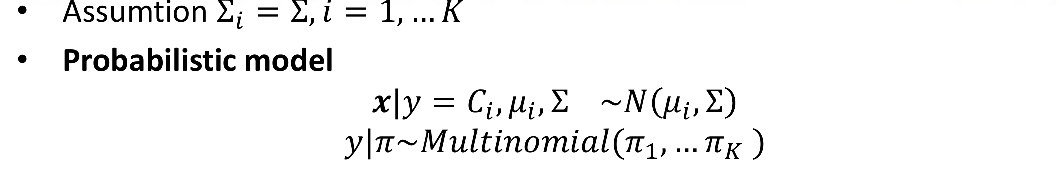

#### d)
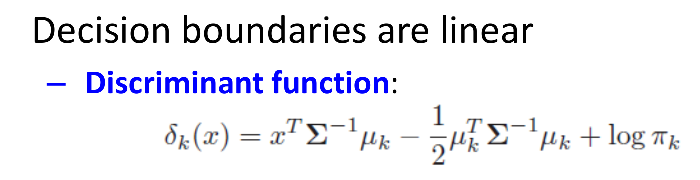
the discriminant function for each class:

we need to calculate these:
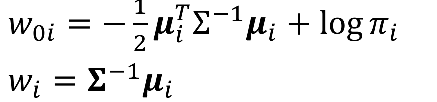

In [129]:
X = as.matrix(iris[,-c(3, 4, 5)])
inv_cov = solve((pooled_cov))
inv_cov

,Sepal.Length,Sepal.Width
Sepal.Length,5.249313,-4.218143
Sepal.Width,-4.218143,12.055965


In [113]:
m1 = as.matrix(m1)
m2 = as.matrix(m2)
m3 = as.matrix(m3)

In [122]:
#line intercept
w0.1 = - 0.5*(t(m1) %*% inv_cov %*% m1) + log(prior[1]) #setosa
w0.2 = -0.5 * (t(m2) %*% inv_cov %*% m2) + log(prior[2]) #versicolor
w0.3 = -0.5 * (t(m3) %*% inv_cov %*% m3) + log(prior[3]) #virginica

In [152]:
round(c(w0.1,w0.2,w0.3),2)

[1] -65.32 -70.48 -85.68

In [145]:
#slope

G1 = c(round(inv_cov %*% m1,3) )
G1


[1] 11.818 20.212

In [146]:
G2 = c(round(inv_cov %*% m2,3) )
G2

[1] 19.476  8.356

In [154]:
G3 = c(round(inv_cov %*% m3,3) )
G3

[1] 22.038  8.065

In [162]:
# c)
# x|y = C_i, mu_i, Sigma ~ N(mu_i, Sigma)
# y|pi ~ Multinomial(pi_1, ..., pi_k)

# d)
# w_0i = -1/2 * mu_i^T * Sigma^-1 * mu_i + log(pi_i)
# w_i = Sigma^-1 * mu_i
# delta_k = x^T * w_k + w_0k

delta1 = X %*% G1 + c( w0.1)
head(delta1,3)

65.69099
53.22139
54.90019


### discriminant functions

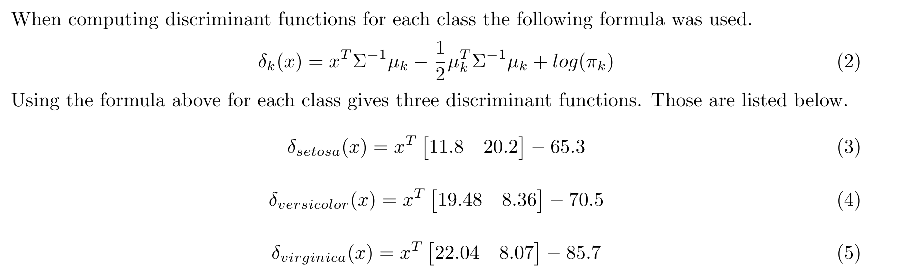

### e) the decision boundaries:

 **Compute equations of decision boundaries between classes and report them**


In [165]:
# e)
# (w_1 - w_2)_l * x + (w_1 - w_2)_w * y + (w0_1 - w0_2) = 0
# (w_1 - w_3)_l * x + (w_1 - w_3)_w * y + (w0_1 - w0_3) = 0
# (w_2 - w_3)_l * x + (w_2 - w_3)_w * y + (w0_2 - w0_3) = 0ca
#first Length # second Width


[1] -7.658 11.856

5.152822


decision boundary for Setosa ~ Versicolor: 


In [181]:
w1 = G1- G2
w1

b.0 = w0.1 - w0.2
 b.0

[1] -7.658 11.856

5.152822


 v e r s i c o l o r − v i r g i n i c a :


In [179]:
w2 = G2 - G3
w2
b.2 =  w0.2 - w0.3
b.2

[1] -2.562  0.291

15.20835


decision boundary for Verginica ~ Setosa


In [182]:
w3 = G3 - G1
w3
b.3 =  w0.3 - w0.1
b.3

[1]  10.220 -12.147

-20.36117


### C

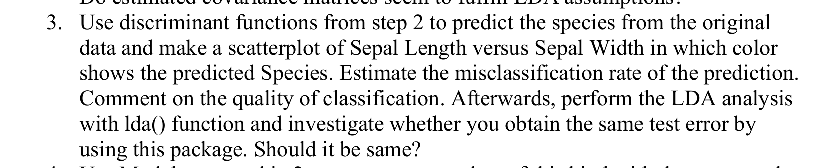

In [256]:
discr_setosa = X %*% G1 + c(w0.1)
discr_versicolor = X %*% G2 + c(w0.2)
discr_virginica = X %*% G3 + c(w0.3)

In [257]:
pred = matrix(NA,n,1)
for(i in 1:n){
    
    pred[i,] = which.max(c(discr_setosa[i],discr_versicolor[i],discr_virginica[i]))
}

In [258]:
pred[which(pred == 1) ,] = 'setosa'
pred[which(pred == 2) ,] = 'versicolor'
pred[which(pred == 3) ,] = 'virginica'
pred = as.factor(pred)

In [259]:
lda_predicted = table(pred,iris$Species)
lda_predicted

            
pred         setosa versicolor virginica
  setosa         49          0         0
  versicolor      1         36        15
  virginica       0         14        35

In [218]:
missclassification_rate_lda <- 1 - (sum(diag(lda_predicted))/nrow(iris))
print(missclassification_rate_lda)


[1] 0.2


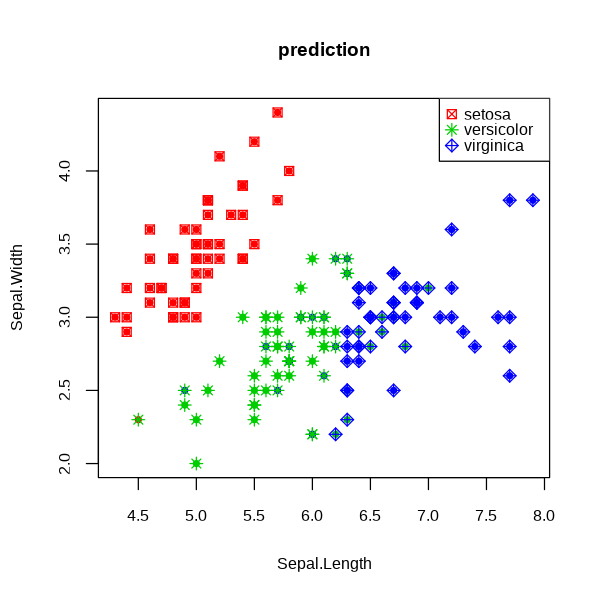

In [273]:
plot(X,main="prediction",pch=20,col = c(2,3,4)[iris$Species])
points(X,
col=c(2,3,4)[pred], pch=c(7,8,9)[pred],
bg=c(2,3,4)[pred])
legend('topright',col = c(2,3,4),legend =unique(as.factor(pred)),
      pch=c(7,8,9))

the error rate is 0.2. the overal prediction is perfect for setosa since it is linearly seperable, however, since versicolor and virginica are not linearly seprable we can see that is where misclassification has occured.
the points with 2 color are the misclassified one on the plot.
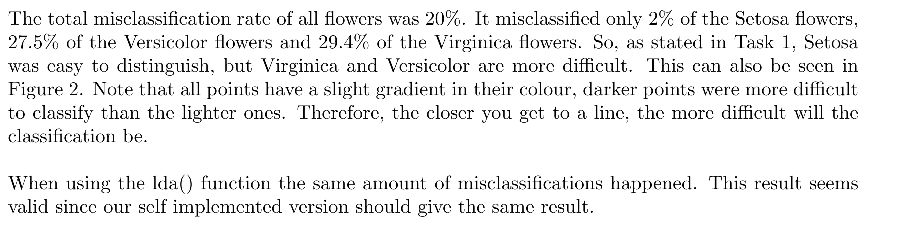

In [286]:
resLDA = lda(Species~ Sepal.Length + Sepal.Width,data = iris)
resLDA

Call:
lda(Species ~ Sepal.Length + Sepal.Width, data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width
setosa            5.006       3.428
versicolor        5.936       2.770
virginica         6.588       2.974

Coefficients of linear discriminants:
                   LD1        LD2
Sepal.Length -2.141178 -0.8152721
Sepal.Width   2.768109 -2.0960764

Proportion of trace:
   LD1    LD2 
0.9628 0.0372 

In [291]:
temp = table(iris$Species,predict(resLDA)$class)
temp
misclass = 1 -  sum( diag(temp))/n
misclass

            
             setosa versicolor virginica
  setosa         49          1         0
  versicolor      0         36        14
  virginica       0         15        35

[1] 0.2

### 4. Use Models reported in 2c to generate new data of this kind with the same total number of cases as in the original data (hint: use sample() and rmvnorm() from package mvtnorm). Make a scatterplot of the same kind as in step 1 but for the new data and compare it with the plots for the original and the predicted data. Conclusions?


In [294]:
library(mvtnorm)
set.seed(12345)

In [408]:
predicted_iris_data = matrix(NA,nrow = 150,ncol = 3 )
colnames(predicted_iris_data) = c('sepal_length', 'sepal_width','Species')
for(i in 1:n){
    spec <- sample(unique(iris$Species), 1, replace=TRUE, prob=prior)
    if (spec == 'setosa'){
        
      predicted_iris_data[i,  ]   = c(rmvnorm(1,mean = m1,sigma = pooled_cov),'setosa')
    }
    
    else if (spec == 'versicolor' ){
       predicted_iris_data[i,  ] =  c(rmvnorm(1,mean = m2, sigma = pooled_cov),'versicolor')
    }
    else{
        
        predicted_iris_data[i,  ] = c(rmvnorm(1,mean=m3,sigma = pooled_cov),'virginica')
    }
}
predicted_iris_data = predicted_iris_data[order(predicted_iris_data[,3 ], predicted_iris_data[,2 ], 
                                                    predicted_iris_data[,1 ]),]


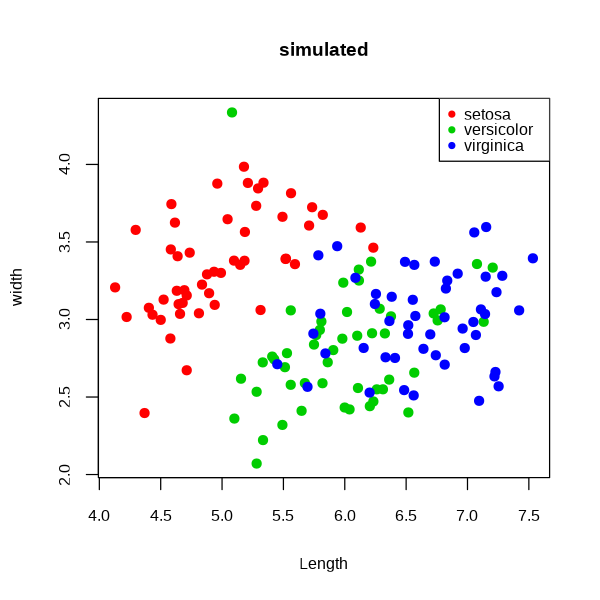

In [412]:
class =iris$Species
plot(x = predicted_iris_data[,1],
    y = predicted_iris_data[,2],col = c(2,3,4)[class],pch=19,main='simulated',
    xlab = 'Length',ylab= 'width')
legend('topright',col = c(2,3,4),legend =unique(predicted_iris_data[,3]),
      pch=20)

The predicted sample looks similar to the plot obtained using original iris data. Setosa is almost same except
for some outliers which are present in the versicolor cluster. In the original data many points were exactly on
the line i.e (the values like 2.5,2,3). Whereas in the predicted sample, most of the samples are not on the
lines as observed.



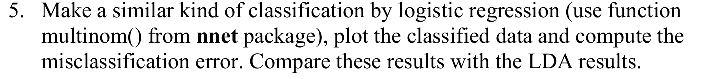

In [413]:
library(nnet)

In [414]:
logist_model = multinom(Species ~ Sepal.Width + Sepal.Length, data = iris)

# weights:  12 (6 variable)
initial  value 164.791843 
iter  10 value 62.715967
iter  20 value 59.808291
iter  30 value 55.445984
iter  40 value 55.375704
iter  50 value 55.346472
iter  60 value 55.301707
iter  70 value 55.253532
iter  80 value 55.243230
iter  90 value 55.230241
iter 100 value 55.212479
final  value 55.212479 
stopped after 100 iterations


In [415]:
logist_model

Call:
multinom(formula = Species ~ Sepal.Width + Sepal.Length, data = iris)

Coefficients:
           (Intercept) Sepal.Width Sepal.Length
versicolor   -92.09925   -40.58755     40.40326
virginica   -105.10096   -40.18800     42.30095

Residual Deviance: 110.425 
AIC: 122.425 

In [425]:
pred.logist_model = predict(logist_model,newdata = iris, "class")

In [426]:
lg.table = table(pred.logist_model,iris$Species)
lg.table

                 
pred.logist_model setosa versicolor virginica
       setosa         50          0         0
       versicolor      0         38        13
       virginica       0         12        37

In [430]:
misclass.lg = 1 - sum(diag(lg.table)/n)
cat('misclassification Error for logistic Regression: \n')
round(misclass.lg,3)

misclassification Error for logistic Regression: 


[1] 0.167

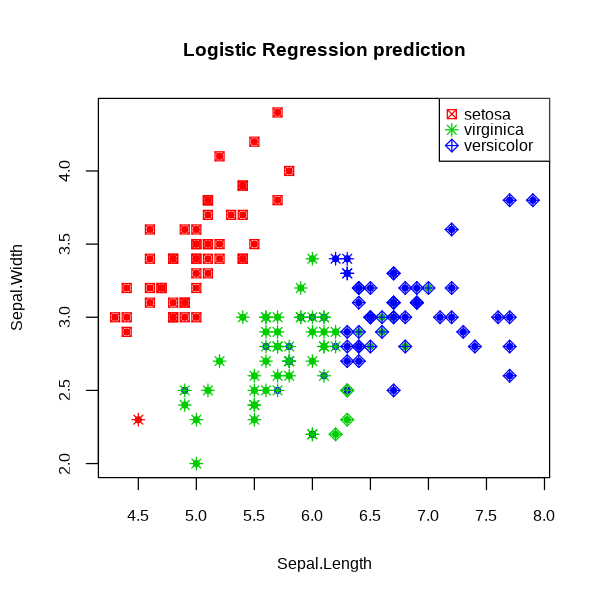

In [435]:
plot(X,main="Logistic Regression prediction",pch=20,col = c(2,3,4)[iris$Species])
points(X,
col=c(2,3,4)[pred.logist_model], pch=c(7,8,9)[pred],
bg=c(2,3,4)[pred])
legend('topright',col = c(2,3,4),legend =unique(as.factor(pred.logist_model)),
      pch=c(7,8,9))

In Task 5, the function multinom() was used to apply Logistic Regression on the Iris data, instead
of LDA. The results became kind of similar, altough the Logistic Regression had a slightly lower
misclassification rate at 16.7%